In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
#load the dataset
train_df =pd.read_csv('train_data.csv')

## DATA EXPLORATION

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# check no. of rows and columns in the dataset
train_df.shape

(1460, 81)

In [5]:
# list all columns in the dataset
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
# check number of null values in each column
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
#divide dataset into target variables and independent variables
y = train_df['SalePrice']
X = train_df.drop('SalePrice', 1)
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
#independent variables with null
for nullcol in X.columns:
      if X[nullcol].isna().any():
        print(nullcol, X[nullcol].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


#### imputing missing values of train data with mean for numerical columns and mode for non numerical columns

In [16]:
# get numerical columns form X
numerical_columns = [col for col in X.columns
                  if X[col].dtype == 'int64' or X[col].dtype == 'float64']
numerical_columns



List of Numerical Columns 
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [17]:
# get object columns form X
object_columns = [col for col in X.columns
                    if X[col].dtype == 'object']
object_columns



['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [19]:

# replace null values in numerical columns with the mean
imputer = SimpleImputer(strategy = 'mean')
imputed_num = pd.DataFrame(imputer.fit_transform(X[numerical_columns]))
# return column names removed due to imputation
imputed_num.columns = list(X[numerical_columns].columns)
imputed_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [20]:
# replace null values in object columns with the most frequent value
imputer = SimpleImputer(strategy = 'most_frequent')
imputed_obj = pd.DataFrame(imputer.fit_transform(X[object_columns]))
imputed_obj.columns = list(X[object_columns].columns)
imputed_obj.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [21]:
# combine numerical and nonnumerical columns
new_X = pd.concat([imputed_num,imputed_obj],axis=1)
new_X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [22]:
new_X.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
                ..
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish

In [23]:
# check if Y has any missing values
y.isnull().any()

False

### Encoding

In [24]:
# categorize independent variables as either numerical, nominal or ordinal
nominal = ['Neighborhood', 'CentralAir', 'Electrical', 'MiscFeature', 'RoofStyle', 'RoofMatl', 
           'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'SaleType', 'Heating', 'SaleCondition']
ordinal = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig','LandSlope', 'Condition1', 
           'Condition2','BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 
           'GarageFinish', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
numerical = ['LotFrontage','Id','MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']

target = ['SalePrice']


In [25]:
# obtain categorical data
categorical_data = new_X.select_dtypes(include=['object']).copy()
categorical_cols = list(categorical_data.columns)

for col in categorical_cols:
      categorical_data[col] = categorical_data[col].astype('category')


In [26]:
# Label encode ordinal predictive features 
for feature in ordinal:
  value = categorical_data[feature]
  encoder = LabelEncoder()
  trans_f = encoder.fit_transform(value)
  categorical_data[feature] = trans_f

encoded_categorical_data=categorical_data
encoded_categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,CollgCr,2,...,Attchd,1,4,4,2,2,2,Shed,WD,Normal
1,3,1,0,3,3,0,2,0,Veenker,1,...,Attchd,1,4,4,2,2,2,Shed,WD,Normal
2,3,1,0,0,3,0,4,0,CollgCr,2,...,Attchd,1,4,4,2,2,2,Shed,WD,Normal
3,3,1,0,0,3,0,0,0,Crawfor,2,...,Detchd,2,4,4,2,2,2,Shed,WD,Abnorml
4,3,1,0,0,3,0,2,0,NoRidge,2,...,Attchd,1,4,4,2,2,2,Shed,WD,Normal


In [27]:
# OneHot Encode nominal predictive features
encoded_categorical_data = pd.concat([pd.get_dummies(encoded_categorical_data[nominal]),encoded_categorical_data],axis=1) 
encoded_categorical_data.drop(nominal,axis=1,inplace=True)
encoded_categorical_data.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,0,0,0,0,0,1,0,0,0,0,...,0,2,6,2,1,4,4,2,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,3,6,4,1,4,4,2,2,2
2,0,0,0,0,0,1,0,0,0,0,...,0,2,6,4,1,4,4,2,2,2
3,0,0,0,0,0,0,1,0,0,0,...,2,2,6,2,2,4,4,2,2,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,6,4,1,4,4,2,2,2


In [28]:
# get dataset that includes numerical features and encoded categorical features
X_prep = pd.concat([encoded_categorical_data, new_X[numerical]], axis=1)
X_prep.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,0,0,1,0,0,0,0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,0,0,0,0,0,0,0,0,0,0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,0,0,0,0,0,1,0,0,0,0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,0,0,0,0,0,0,1,0,0,0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,0,0,0,0,0,0,0,0,0,0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [33]:
X_prep.shape

(1460, 182)

#### Form a Matrix

In [34]:
# convert prepared X to an array
X_array = X_prep.to_numpy()

In [35]:
# standardize the array of X using StandardScaler
X_standardized = StandardScaler().fit_transform(X_array)
X_standardized

array([[-0.10854037, -0.03703704, -0.10526316, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [-0.10854037, -0.03703704, -0.10526316, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.10854037, -0.03703704, -0.10526316, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

### Perform PCA and filter out 2 Principal Components (PC)

In [36]:
#the sklearn library will be used to import the PCA module
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_standardized)

In [37]:
#create a DataFrame that will have the principal component values
pca_data = pd.DataFrame(pcs, columns=['principalcomponent1', 'principalcomponent2'])
data = pd.concat([pca_data, train_df[target]], axis=1)
data.head()

,principalcomponent1,principalcomponent2,SalePrice
0,2.885214,-0.685818,208500
1,-0.505011,2.694327,181500
2,3.340851,-0.187431,223500
3,-2.276063,-1.511971,140000
4,5.168719,0.282551,250000


### Determine the percentage of information carried by the above 2 Principal Component

In [38]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# This will provide you with the amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace.

Explained variation per principal component: [0.07326455 0.03365114]


### If we were to capture 90% variance, how many PCs will be needed?

In [39]:
pca = PCA(0.9)
pca.fit_transform(X_standardized)
pca.n_components_

106

### general linear regression equation for this challenge using only two PCs

In [40]:
# get the dependent and independent variables from the final PCA dataframe
y = data['SalePrice'] 
X = data.iloc[:, :-1]  
regressor=LassoCV()
regressor.fit(X, y)

C:\Users\rosan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [41]:
# get the weights and intercept
w1 = regressor.coef_[0]
w2 = regressor.coef_[1]
b = regressor.intercept_
w1, w2, b

(17703.164070863313, 458.3793966407896, 180921.19589041095)

###### y_hat = 17073.5 X1 + 1120.12 X2 + 180921.2

## Plot a 3D plane of Best Fit

In [42]:
# get an array of the pca dataframe excluding the SalePrice
final_array = np.array(data.iloc[:, :-1])
final_array

array([[ 2.88521356, -0.68581821],
       [-0.50501064,  2.69432702],
       [ 3.34085097, -0.18743069],
       ...,
       [ 0.68703022, -1.4101737 ],
       [-3.49261599,  2.2621679 ],
       [-1.15707931,  3.46729761]])

In [43]:
# find minimum and maximum values in the array
minimum = np.min(final_array, axis = 0)
maximum = np.max(final_array, axis = 0)
minimum, maximum

(array([-8.30330251, -7.6775766 ]), array([16.1562524 ,  9.35151812]))

In [44]:
# get an array of linearly spaced elements with the min and max values as limits
x = np.linspace(minimum[0], maximum[0], 20)
y = np.linspace(minimum[1], maximum[1], 20)
x, y

(array([-8.30330251, -7.01595752, -5.72861252, -4.44126753, -3.15392253,
        -1.86657754, -0.57923254,  0.70811246,  1.99545745,  3.28280245,
         4.57014744,  5.85749244,  7.14483743,  8.43218243,  9.71952743,
        11.00687242, 12.29421742, 13.58156241, 14.86890741, 16.1562524 ]),
 array([-7.6775766 , -6.78130846, -5.88504032, -4.98877217, -4.09250403,
        -3.19623589, -2.29996774, -1.4036996 , -0.50743146,  0.38883669,
         1.28510483,  2.18137298,  3.07764112,  3.97390926,  4.87017741,
         5.76644555,  6.66271369,  7.55898184,  8.45524998,  9.35151812]))

In [45]:
# get 2 2D arrays representing X and Y coordinates
X, Y = np.meshgrid(x, y) 
Z = w1*X + w2*Y + b

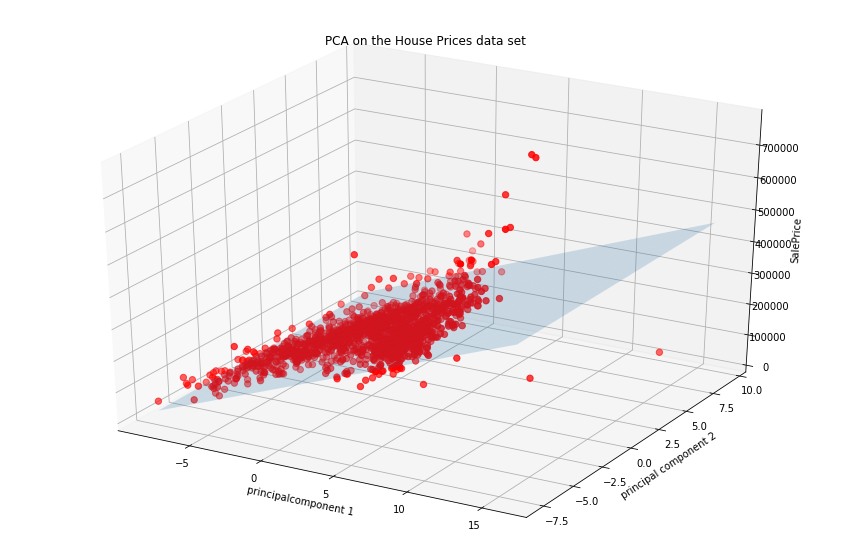

In [49]:
from mpl_toolkits import mplot3d
# Plot initialisation
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data['principalcomponent1'], data['principalcomponent2'], data['SalePrice'], c='r', s=40)
 
# label the axes
ax.set_xlabel("principalcomponent 1")
ax.set_ylabel("principal component 2")
ax.set_zlabel("SalePrice")
ax.set_title("PCA on the House Prices data set")
plt.show()